<h1 style="text-align: center;">Prueba - Hito 2 - Desafío 1: Determinantes del ingreso</h1>
<p>Óscar Aguilera Badilla - G59</p>

## Preliminares
### Decripción del problema
- Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza
extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo.
- Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de
atributos sociodemográficos.

### Objetivos
- Encontrar un modelo predictivo que permita determinar la probabilidad de que una persona presenta salarios sobre los 50.000 dólares anuales, basado en ciertos actributos que influyen en esta probabilidad.

### Desarrollo

- El vector objetivo es la celda income la cuál se pretenden predecir en probabilidad. Cómo es una dato binario, se trata de un problema de clasificiación.
- Preprosesamiento: 
    - Cambiar signos por nulos
    - Determinar qué datos o qué columna eliminar en base a la cantidad de nulos.
    - Recodificación de variables según lo señala el problema. 
    - Recategorización de variables: Establacer valores numéricos binarios,    

- Modelo a utilizar: regresión logística ya que el vector objetivo es binario
- Determinar variables significativas:
    - Correr modelo de regresión logística
    - Depurar las variables: Dejar variables significativas a través de pValue 
    - Se simplifica el modelo, se entrena el modelo logistico con estas variables.
-Entrenamiento:
    - Entrenamiento supervizado con división de data set para entrenamiento y pruebas.
- Revisión modelo: puntaje f1, accuracy. 
- Evaluación del desempeño del modelo reducido versus al total con log verosimilitud.
- Matriz de confusión y luego se calcula la precisión para determinar qué tan bueno está el modelo y si hace lo que estamos necesitando.
- Curva Roc, permite evaluar el rango de error del modelo y la relación entre falsos positivios y falsos negativos. 
- Variación del modelo para ajustar su desempeño.

### Librerías a usar

- pandas y numpy: para trabajar el dataframe, manejar y convertir los datos. Analizar a grandes rasgos la caracteristica de las variables.
- seaborn y matplotlib: Para obtener distintos gráficos que nos permitan analizar el comportamiento y correlación de las variables.
- statsmodel: analizar comportamiento estadístico, determinación de variables significativas y creación del modelo
- sklearn: librería de machine learning para entrenar el modelo descrito, estandarizar y utilización de métricas para evaluar calidad del modelo. 
- warning: Librería que permite eliminar mensajes no desedos respecto a las deprecación
- funciones propias: Archivo con funciones propias para automatizar procesos comunes.




##  Anáilisis descriptivo
A continuación se realiza la inspección visual del vector objetivo y de las variables independientes para realizar un análisis descriptivo de las mismas, determinar su tipo y la manera en que se distribuyen.

In [1]:
# Se importan las librerías a utilizad

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msgno 
import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.style.use('seaborn')

#Funciones propias
import funciones_propias as fp

# Importación del DataFrame de datos: 

df = pd.read_csv('../data/income-db.csv')

#Revisión general de las primeras filas de datos
df.head(20)



C:\Windows\Temp\ipykernel_1872\2405795611.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


age         workclass  fnlwgt     education  educational-num   
0    25           Private  226802          11th                7  \
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18                 ?  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29                 ?  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58                 ?  299831       HS-grad                9   
14   48           Private  279724       HS-grad                9   
15   43           Private  346189       Masters               14   
16   20         State-gov  444554  Some-college               10   
17   43           Private  128354       HS-grad                9   
18   37           Private   60548       HS-grad                9   
19   40           Private   85019     Doctorate               16   

        marital-status         occupation   relationship                race   
0        Never-married  Machine-op-inspct      Own-child               Black  \
1   Married-civ-spouse    Farming-fishing        Husband               White   
2   Married-civ-spouse    Protective-serv        Husband               White   
3   Married-civ-spouse  Machine-op-inspct        Husband               Black   
4        Never-married                  ?      Own-child               White   
5        Never-married      Other-service  Not-in-family               White   
6        Never-married                  ?      Unmarried               Black   
7   Married-civ-spouse     Prof-specialty        Husband               White   
8        Never-married      Other-service      Unmarried               White   
9   Married-civ-spouse       Craft-repair        Husband               White   
10  Married-civ-spouse  Machine-op-inspct        Husband               White   
11  Married-civ-spouse       Adm-clerical        Husband               White   
12       Never-married       Adm-clerical  Not-in-family               White   
13  Married-civ-spouse                  ?        Husband               White   
14  Married-civ-spouse  Machine-op-inspct        Husband               White   
15  Married-civ-spouse    Exec-managerial        Husband               White   
16       Never-married      Other-service      Own-child               White   
17  Married-civ-spouse       Adm-clerical           Wife               White   
18             Widowed  Machine-op-inspct      Unmarried               White   
19  Married-civ-spouse     Prof-specialty        Husband  Asian-Pac-Islander   

    gender  capital-gain  capital-loss  hours-per-week native-country income  
0     Male             0             0              40  United-States  <=50K  
1     Male             0             0              50  United-States  <=50K  
2     Male             0             0              40  United-States   >50K  
3     Male          7688             0              40  United-States   >50K  
4   Female             0             0              30  United-States  <=50K  
5     Male             0             0              30  United-States  <=50K  
6     Male             0             0              40  United-States  <=50K  
7     Male          3103             0              32  United-States   >50K  
8   Female             0             0              40  United-States  <=50K  
9     Male             0             0              10  United-States  <=50K  
10    Male          6418 

<Axes: >

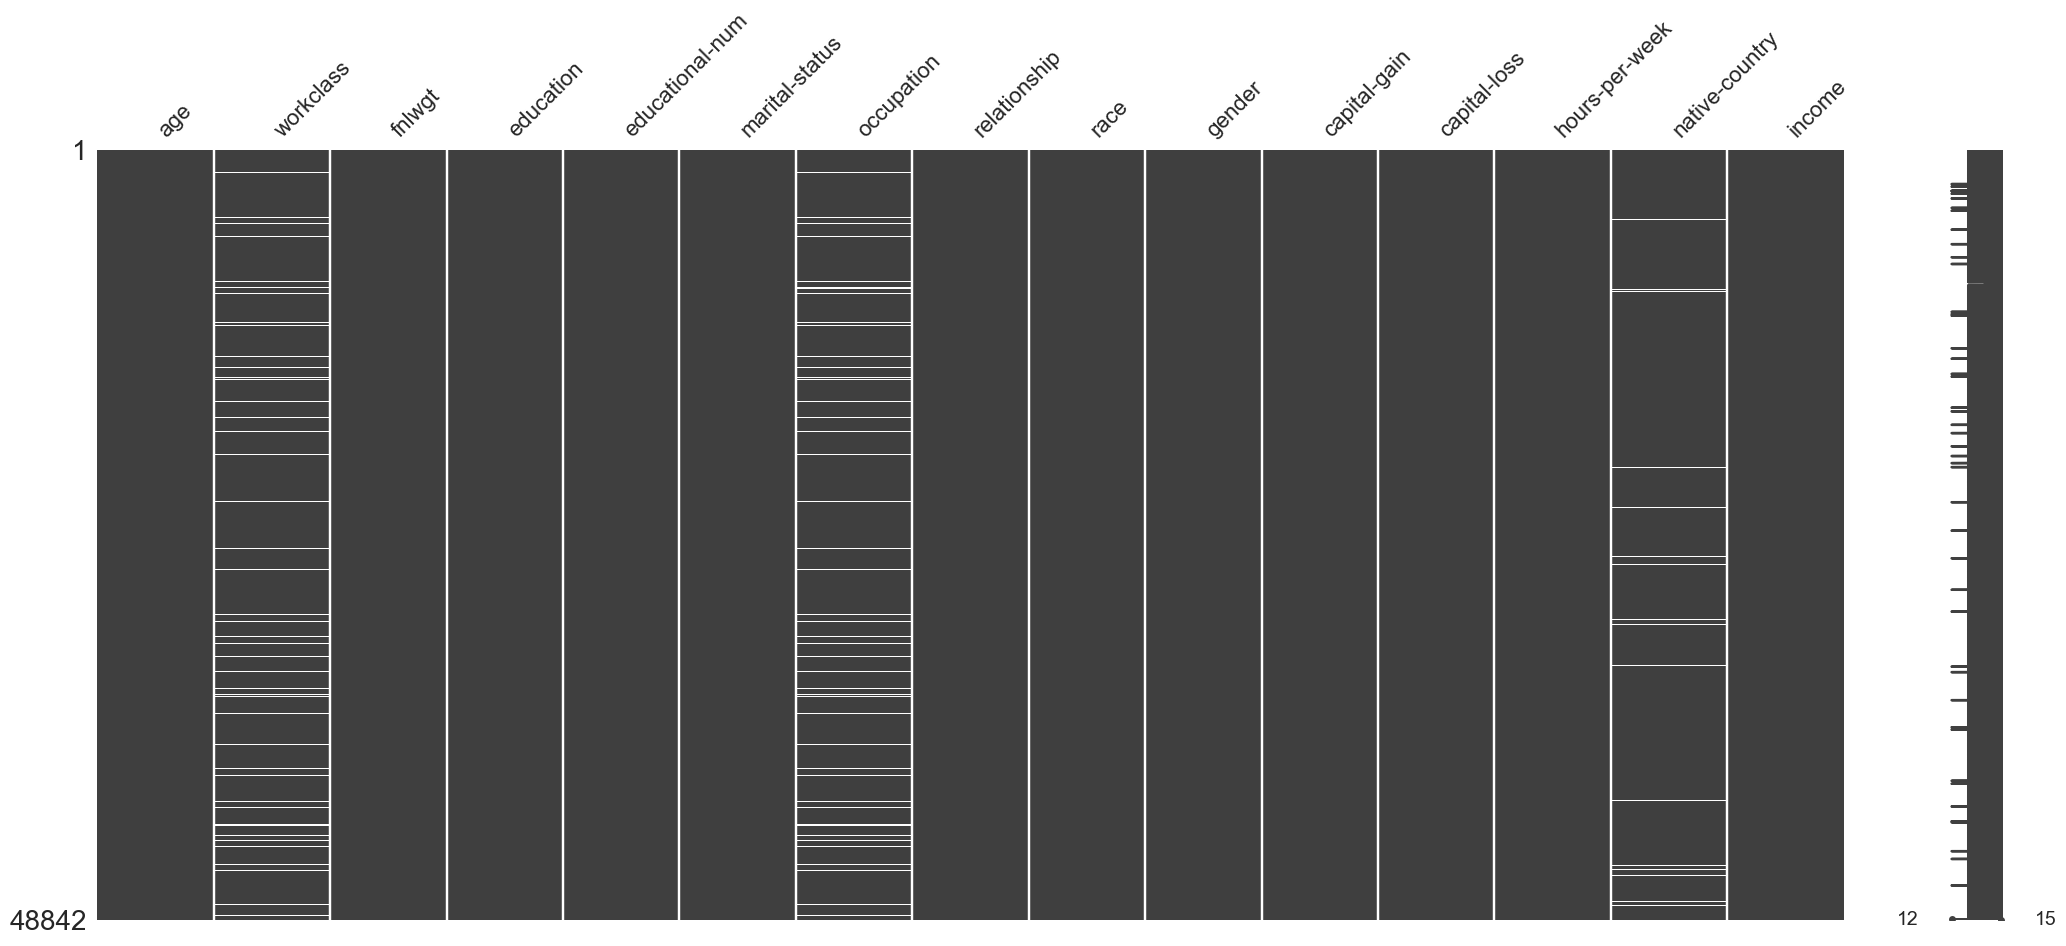

In [2]:
# Se reemplazan los valores que contengan el signo '?' ya que estos representan datos perdidos a valor NaN. 
df = df.replace('?', np.nan)
msgno.matrix(df) # Se muestra un esquema con los datos NaN para observarlos y decidir qué hacer con esa columna.

In [3]:
# Las columnas workclass, occupation y native-counrty presentan datos perdidos

df_len = len(df)

for col in ['workclass','occupation','native-country']:
    nans = df[col].isna().sum()
    print(f' La columna {col} presenta {nans} datos perdidos y representa el {round(100*nans/df_len,3)}% del total de datos')

 La columna workclass presenta 2799 datos perdidos y representa el 5.731% del total de datos
 La columna occupation presenta 2809 datos perdidos y representa el 5.751% del total de datos
 La columna native-country presenta 857 datos perdidos y representa el 1.755% del total de datos


Según los resultados referentes a los valores nulos, se establece que es posible eliminar las filas con estos valores y continuar el análisis sin ellas.

<Axes: >

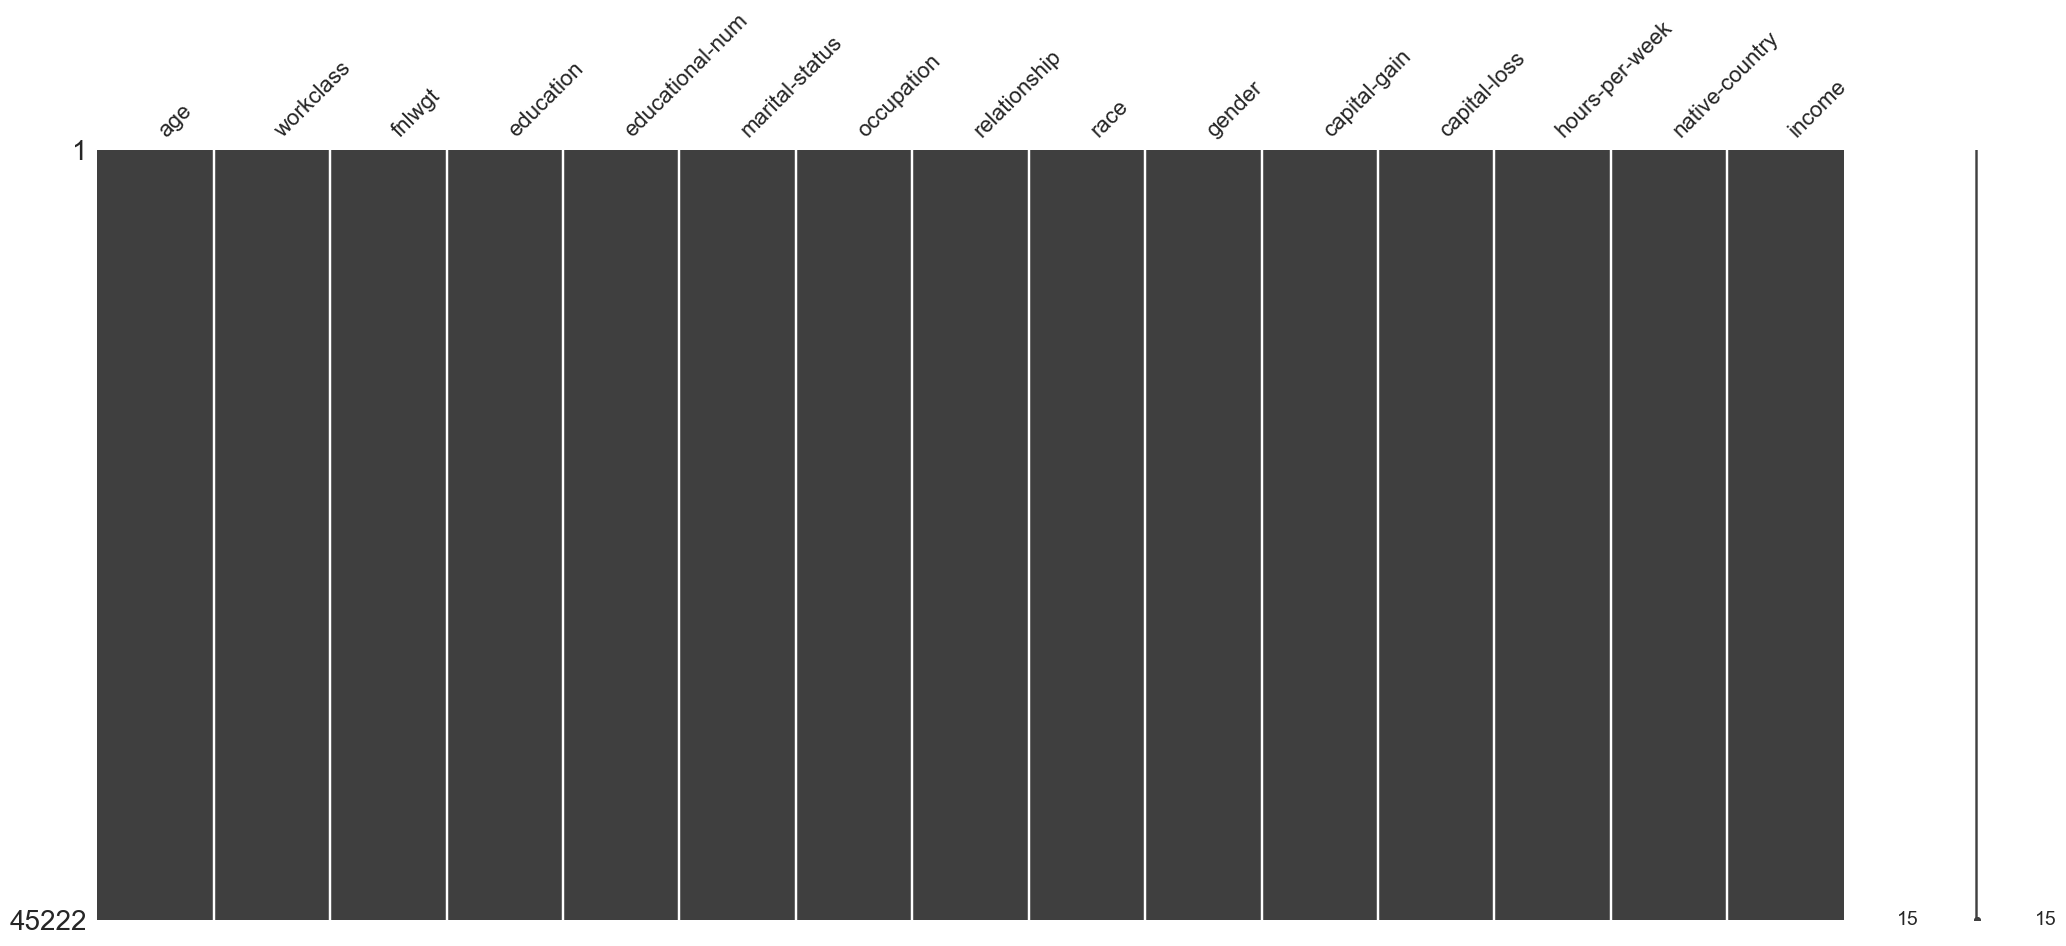

In [4]:
# Limpieza da datos perdidos: Se eliminan los datos perdidos y se continúa con todas las columnas ya que no representan un gran porcentaje del total. 
df = df.dropna()
msgno.matrix(df)

In [5]:
# Separamos todas las variables que son categóricas
categorical_columns = ['workclass', 'education', 'occupation',	'relationship',	'race',	'gender', 'native-country','income']
# iniciamos un loop para cada variable categórica donde:
for cat in categorical_columns:
    # imprimimos el nombre
    print("\n",cat)
    # solicitamos la frecuencia relativa de cada categoría dentro de la variable
    print(df[cat].value_counts())
    # solicitamos el porcentaje de la frecuencia relativa
    print((df[cat].value_counts()/len(df[cat])))


 workclass
workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: count, dtype: int64
workclass
Private             0.736522
Self-emp-not-inc    0.083941
Local-gov           0.068551
State-gov           0.043032
Self-emp-inc        0.036398
Federal-gov         0.031091
Without-pay         0.000464
Name: count, dtype: float64

 education
education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64
education
HS-grad         0.326898
Some-college    0.218898
Bachelors       0.167396
Masters         0.055592
Assoc-voc       0.0

### Visualización de los datos
A continuación se realiza la visualización de cada columna y la del vector objetivo con el objetivo de analizar su distribución y comportamiento según el tipo de dato.

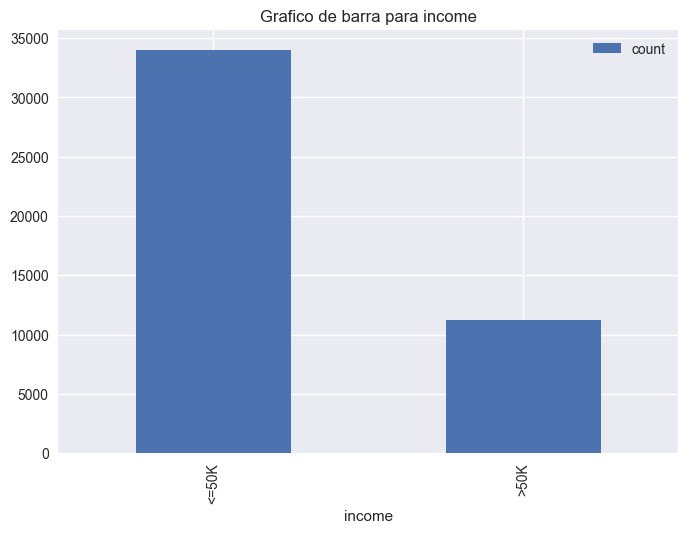

In [6]:
fp.plot_freq(df, "income")

**Comentario:** La variable income tiene muchas observaciones de <=50k, lo que puedo crear un desbalance cuando se cree el modelo, habria que fijarse en las metricas que se obtengan

In [7]:
df["income"] = np.where(df["income"] == ">50K", 1, 0)

In [8]:
def cambio_nombre_col(data, var, n_var):
    data.rename(columns={var:n_var}, inplace=True)

In [9]:
cambio_nombre_col(df,'occupation','collars')

In [10]:
df = df.replace(["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales", "Tech-support"], 
                ["white-collar", "white-collar", "white-collar", "white-collar", "white-collar"])


In [11]:
df = df.replace(["Craft-repair", "Machine-op-inspct", "Transport-moving", "Handlers-cleaners", "Farming-fishing", 
                 "Protective-serv", "Priv-house-serv"], ["blue-collar", "blue-collar", "blue-collar", "blue-collar", 
                 "blue-collar", "blue-collar", "blue-collar"])

In [12]:
df = df.replace(["Other-service", "Armed-Forces"], ["c_others", "c_others"])


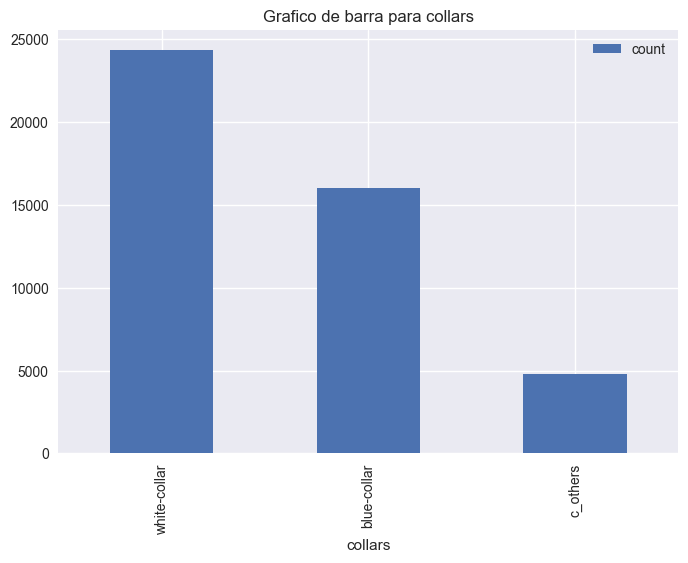

In [13]:
fp.plot_freq(df, "collars")

**Comentario:** La variable white-collar es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en others, esta incluido fuerzas armadas, no se como se habra tomado la muestra, pero generalmente son pocos en una sociedad, y tambien yo hubiera pensado que blue collars tendria mas porque tiene mas clases y es mas variada

In [14]:
df["blue-collar"] = np.where(df["collars"] == "blue-collar", 1, 0)
df["c_others"] = np.where(df["collars"] == "c_others", 1, 0)

In [15]:
cambio_nombre_col(df, "workclass", "workclass_recod")

In [16]:
df = df.replace(["Federal-gov"], ["federal-gov"])


In [17]:
df = df.replace(["State-gov","Local-gov"], ["state-level-gov","state-level-gov"])


In [18]:
df = df.replace(["Self-emp-inc","Self-emp-not-inc"], ["self-employed","self-employed"])

In [19]:
df = df.replace(["Never-worked","Without-pay"], ["unemployed","unemployed"])

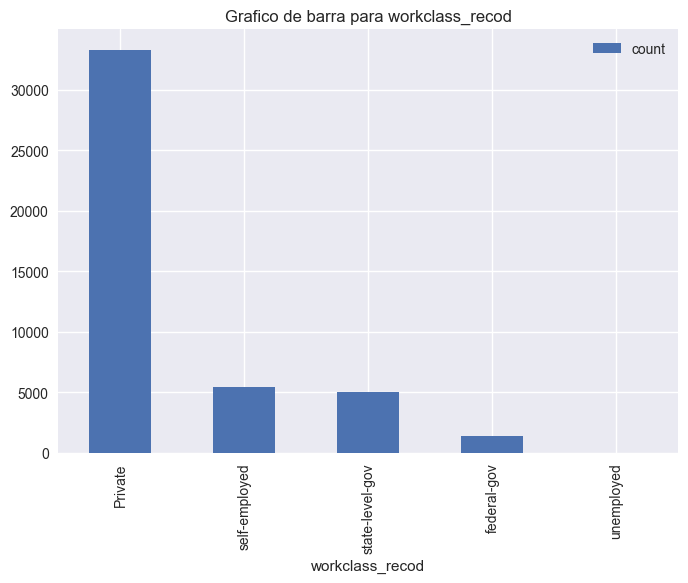

In [20]:
fp.plot_freq(df, "workclass_recod")

**Comentario:** La variable Private es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en unemployed (21), la mayoria trabaja en el sector privado

In [21]:
df["self-employed"] = np.where(df["workclass_recod"] == "self-employed", 1, 0)
df["state-level-gov"] = np.where(df["workclass_recod"] == "state-level-gov", 1, 0)
df["federal-gov"] = np.where(df["workclass_recod"] == "federal-gov", 1, 0)
df["unemployed"] = np.where(df["workclass_recod"] == "unemployed", 1, 0)

In [22]:
cambio_nombre_col(df, "education", "educ_recod")

In [23]:
df = df.replace(["Preschool"], ["preschool"])

In [24]:
df = df.replace(["1st-4th", "5th-6th"], ["elementary-school","elementary-school"])

In [25]:
df = df.replace(["7th-8th", "9th", "10th", "11th", "12th", "HS-grad"], ["high-school","high-school", "high-school", "high-school", "high-school", "high-school"])

In [26]:
df = df.replace(["Assoc-voc","Assoc-acdm", "Some-college"], ["college","college", "college"])

In [27]:
df = df.replace(["Bachelors","Masters", "Prof-school", "Doctorate"], ["university","university", "university", "university"])

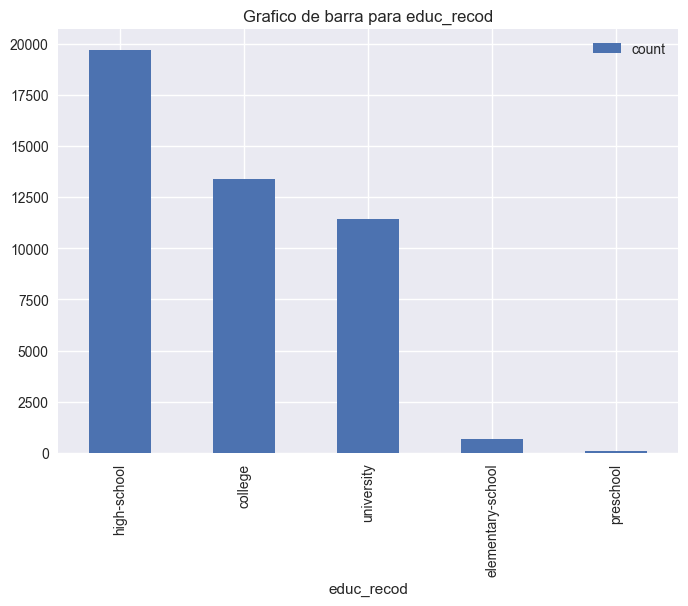

In [28]:
fp.plot_freq(df, "educ_recod")

**Comentario:** La variable high-school es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas las personas tienen grado preescolar y elemental, la mayoria termino o llego hasta la secundaria. Aunque si se suma el college y university, hay mas gente que estudio despues de la secundaria

In [29]:
df["college"] = np.where(df["educ_recod"] == "college", 1, 0)
df["university"] = np.where(df["educ_recod"] == "university", 1, 0)
df["elementary-school"] = np.where(df["educ_recod"] == "elementary-school", 1, 0)
df["preschool"] = np.where(df["educ_recod"] == "preschool", 1, 0)

In [30]:
cambio_nombre_col(df, "marital-status", "civstatus")

In [31]:
df = df.replace(["Married-civ-spouse","Married-spouse-absent", "Married-AF-spouse"], ["married","married", "married"])

In [32]:
df = df.replace(["Divorced"], ["divorced"])

In [33]:
df = df.replace(["Separated"], ["separated"])

In [34]:
df = df.replace(["Widowed"], ["widowed"])

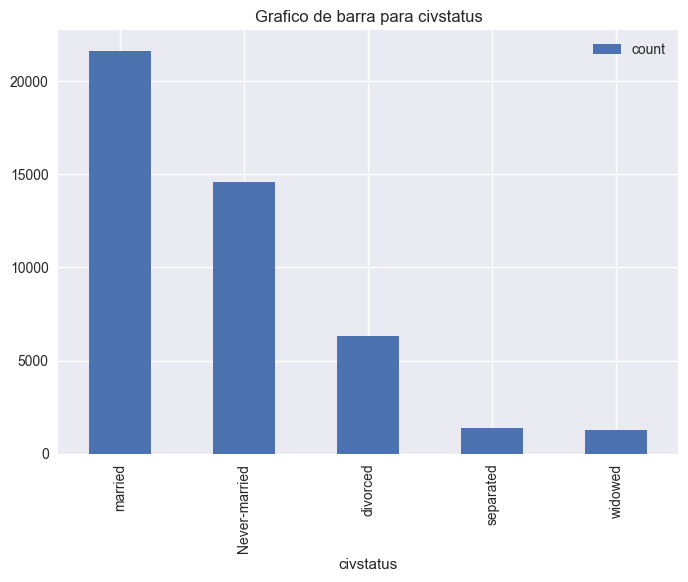

In [35]:
fp.plot_freq(df, "civstatus")

**Comentario:** La variable married es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en viudos y separados, la mayoria de las personas estan casadas, pero los never-married igual tienen un cifra considerable

In [36]:
df["Never-married"] = np.where(df["civstatus"] == "Never-married", 1, 0)
df["divorced"] = np.where(df["civstatus"] == "divorced", 1, 0)
df["separated"] = np.where(df["civstatus"] == "separated", 1, 0)
df["widowed"] = np.where(df["civstatus"] == "widowed", 1, 0)

In [37]:
cambio_nombre_col(df, "native-country", "region")

In [38]:
df = df.replace(["Philippines","India", "China", "Japan", "Vietnam", "Iran", "Taiwan", "Thailand",
                "Cambodia", "Hong", "Laos"], 
                ["Asia","Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia"])

In [39]:
df = df.replace(["United-States","Mexico", "Puerto-Rico", "Canada", "El-Salvador", "Cuba", "Jamaica", "Dominican-Republic",
                "Guatemala", "Columbia", "Haiti", "Nicaragua", "Peru", "Ecuador", "Trinadad&Tobago", "Outlying-US(Guam-USVI-etc)",
                "Honduras"], 
                ["America","America", "America", "America", "America", "America", "America", "America", "America", "America",
                 "America", "America", "America", "America", "America", "America", "America"])

In [40]:
df = df.replace(["Germany","England", "Italy", "Poland", "Portugal", "Greece", "Ireland", "France",
                "Yugoslavia", "Scotland", "Hungary","Holand-Netherlands"], 
                ["Europa","Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa",
                "Europa"])

In [41]:
df = df.replace(["South"], 
                ["Africa"])

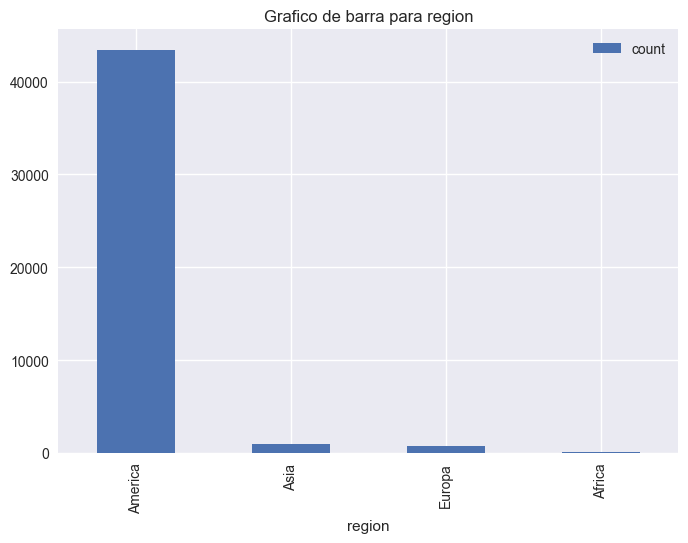

In [42]:
fp.plot_freq(df, "region")

**Comentario:** La variable America es la de mayor frecuencia, al recodificar esta se dejara fuera. America tiene demasiadas observaciones, quizas habria que aplicar otro preprocesamiento aca, no estoy seguro si tambien al tener muchas observaciones de una sola variable puede producir algun tipo de sesgo o sobreajuste.

In [43]:
df["Asia"] = np.where(df["region"] == "Asia", 1, 0)
df["Africa"] = np.where(df["region"] == "Africa", 1, 0)
df["Europa"] = np.where(df["region"] == "Europa", 1, 0)

d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_3\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


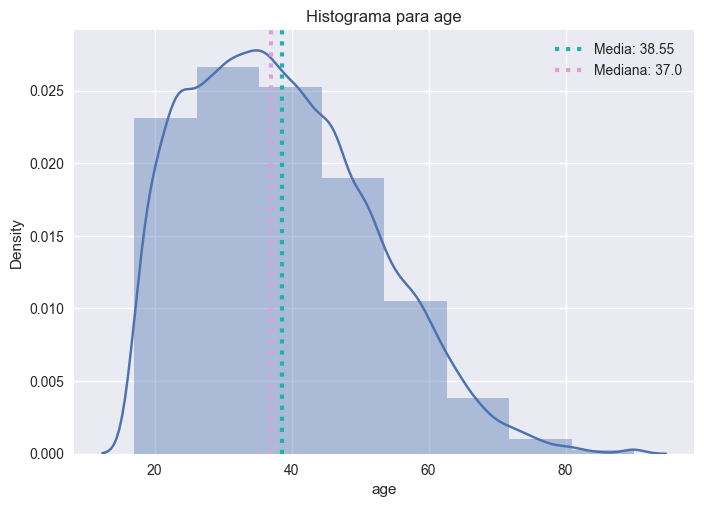

In [44]:
fp.plot_hist(df, "age");

**Comentario:** En la variable age, el minimo es 17 y el maximo 90, existe una concentracion entre los 17 y casi los 55 que corresponde a quizas se concentro la muestra en personas que estaban trabajando. La media y mediana se encuentran relativamente cerca, pero no en el centro de la curva. visualmente no tiende a una curva normal.

d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_3\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


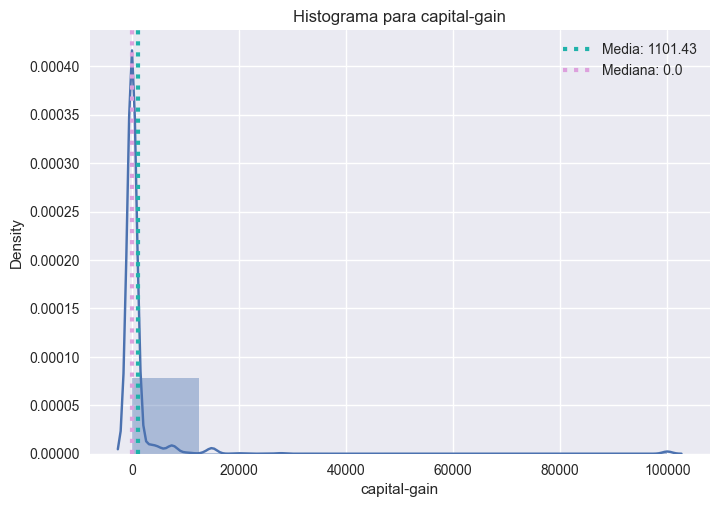

In [45]:
fp.plot_hist(df, "capital-gain");

In [46]:
df["capital-gain"] = np.where(df["capital-gain"] > 0, 1, 0)

**Comentario**: En la variable capital-gain, el minimo es 0 y el maximo 99999, existe una concentracion o acumulacion de 0 (hasta el 75% de los datos segun el describe existen 0). Recodifique la variable como los valores 0 igual a 0, y mayor a 0 como 1

d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_3\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


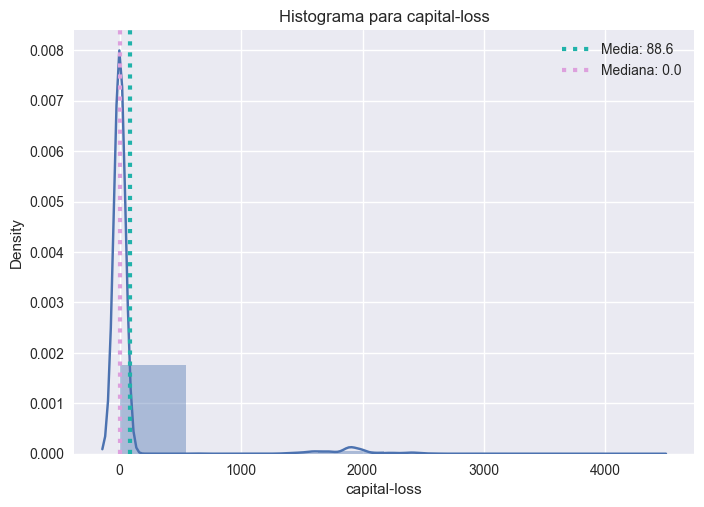

In [47]:
fp.plot_hist(df, "capital-loss");

In [48]:
df["capital-loss"] = np.where(df["capital-loss"] > 0, 1, 0)

**Comentario:** En la variable capital-loss, el minimo es 0 y el maximo 4356, existe una concentracion o acumulacion de 0 (hasta el 75% de los datos segun el describe existen 0). Recodifique la variable como los valores 0 igual a 0, y mayor a 0 como 1

d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_3\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


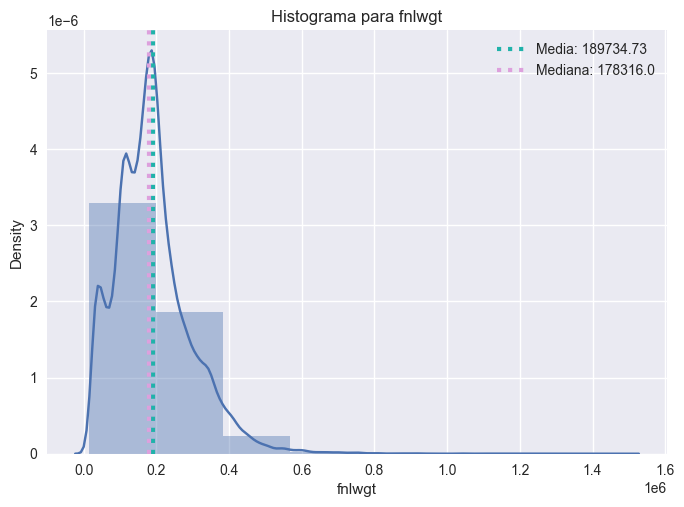

In [49]:
fp.plot_hist(df, "fnlwgt");

**Comentario:** Es un ponderador no sabria interpretar

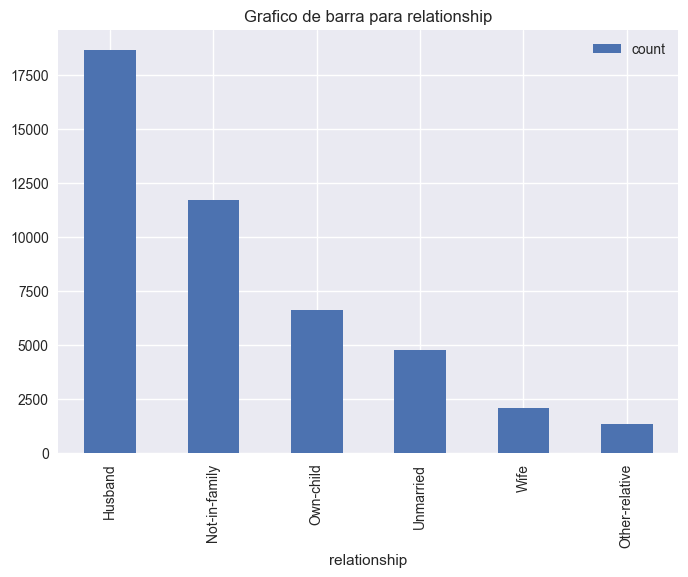

In [50]:
fp.plot_freq(df, "relationship")

**Comentario:** La variable Husband es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas las personas other-relative, la mayoria son husband, lo que tambien corresponde que la mayoria de encuestados eran hombres. Hay pocas wife en la muestra.

In [51]:
df["Not-in-family"] = np.where(df["relationship"] == "Not-in-family", 1, 0)
df["Own-child"] = np.where(df["relationship"] == "Own-child", 1, 0)
df["Unmarried"] = np.where(df["relationship"] == "Unmarried", 1, 0)
df["Wife"] = np.where(df["relationship"] == "Wife", 1, 0)
df["Other-relative"] = np.where(df["relationship"] == "Other-relative", 1, 0)

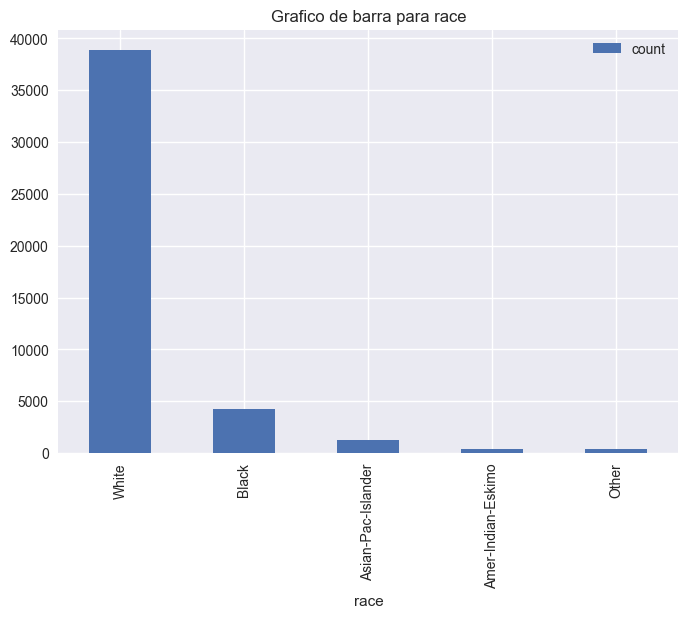

In [52]:
fp.plot_freq(df, "race")

**Comentario:** La variable White es la de mayor frecuencia, al recodificar esta se dejara fuera. Son muy pocas observaciones de las otras variables.

In [53]:
df["Black"] = np.where(df["race"] == "Black", 1, 0)
df["Asian-Pac-Islander"] = np.where(df["race"] == "Asian-Pac-Islander", 1, 0)
df["Amer-Indian-Eskimo"] = np.where(df["race"] == "Amer-Indian-Eskimo", 1, 0)
df["r_Other"] = np.where(df["race"] == "Other", 1, 0)

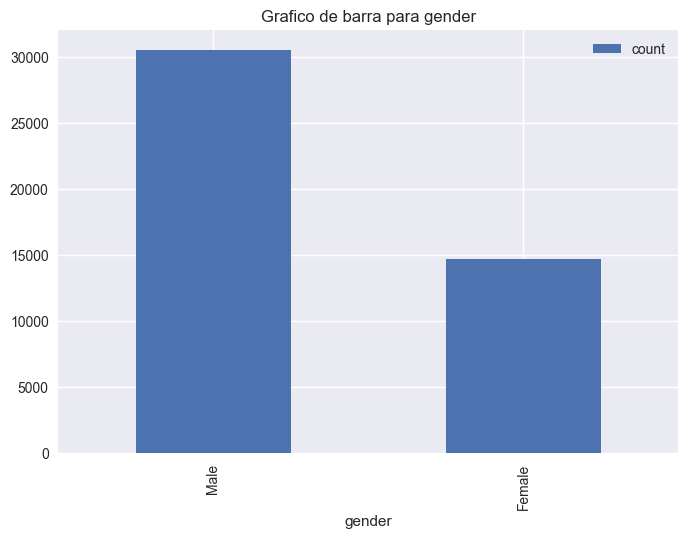

In [54]:
fp.plot_freq(df, "gender")

**Comentario:** La variable Male es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Tiene relacion con el grafico de relationship, se puede que la mayoria de male, aunque aca se puede ver que casi la mitad de female, lo que no se apreciaba en el otro grafico

In [55]:
df["gender"] = np.where(df["gender"] == "Female", 1, 0)


d:\Programación\DesafioLatam\desafiolatam\dataScienceFund\Prueba\hito_3\funciones_propias.py:57: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[variable], bins=8)


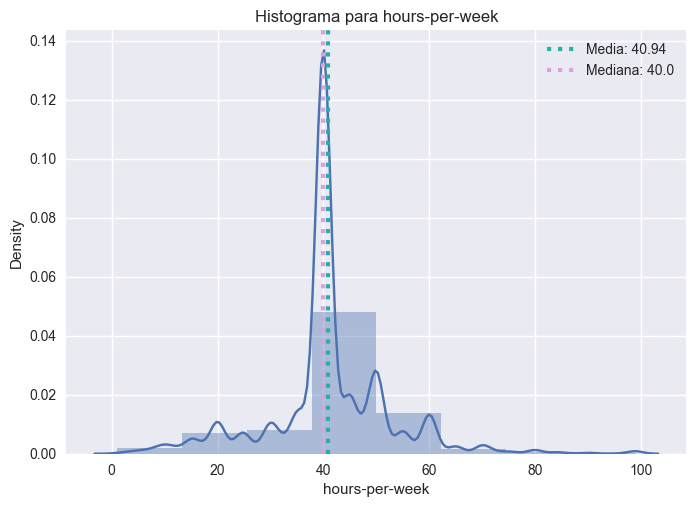

In [56]:
fp.plot_hist(df, "hours-per-week");

En la variable hours-per-week, el minimo es 1 y el maximo 99, existe una concentracion entre los 38 y casi los 50 aprox. que corresponde a quizas a la jornada normal de trabajo. La media y mediana se encuentran relativamente cerca, tambien cerca en el centro de la curva. visualmente no tiende a una curva normal, quizas si hubieran mas datos tendrian mas forma de normal, ya que tiene una curtosis muy grande

## Hito 3

In [57]:
df.columns

Index(['age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
       'civstatus', 'collars', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'region', 'income',
       'blue-collar', 'c_others', 'self-employed', 'state-level-gov',
       'federal-gov', 'unemployed', 'college', 'university',
       'elementary-school', 'preschool', 'Never-married', 'divorced',
       'separated', 'widowed', 'Asia', 'Africa', 'Europa', 'Not-in-family',
       'Own-child', 'Unmarried', 'Wife', 'Other-relative', 'Black',
       'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'r_Other'],
      dtype='object')

**Comentario:** tuve que realizar un cambio de nombre a las columnas, ya que el al correr el modelo no permitia las variables que tuviera "-"

In [58]:
cambio_nombre_col(df,'educational-num','educational_num')
cambio_nombre_col(df,'Never-married','Never_married')
cambio_nombre_col(df,'blue-collar', "blue_collar")
cambio_nombre_col(df,'hours-per-week', "hours_per_week")
cambio_nombre_col(df,'self-employed', "self_employed")
cambio_nombre_col(df,'state-level-gov', "state_level_gov")
cambio_nombre_col(df,'federal-gov', "federal_gov")
cambio_nombre_col(df,'elementary-school', "elementary_school")
cambio_nombre_col(df,'Not-in-family', "Not_in_family")
cambio_nombre_col(df,'Own-child', "Own_child")
cambio_nombre_col(df,'Other-relative', "Other_relative")
cambio_nombre_col(df,'Asian-Pac-Islander', "Asian_Pac_Islander")
cambio_nombre_col(df,'Amer-Indian-Eskimo', "Amer_Indian_Eskimo")
cambio_nombre_col(df,'capital-gain', "capital_gain")
cambio_nombre_col(df,'capital-loss', "capital_loss")


In [59]:
modelo = smf.logit("income ~ age + educational_num + gender + capital_gain + capital_loss + hours_per_week + blue_collar + c_others + self_employed + state_level_gov + federal_gov + unemployed + college + university + elementary_school + preschool + Never_married + divorced + separated + widowed + Asia + Africa + Europa + Not_in_family + Own_child + Unmarried + Wife + Other_relative + Black + Asian_Pac_Islander + Amer_Indian_Eskimo + r_Other ", df).fit()
modelo.summary2()

Optimization terminated successfully.
         Current function value: 0.346677
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.381     
Dependent Variable:   income           AIC:              31420.8878
Date:                 2023-04-22 17:23 BIC:              31708.6260
No. Observations:     45222            Log-Likelihood:   -15677.   
Df Model:             32               LL-Null:          -25322.   
Df Residuals:         45189            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       9.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -5.5595   0.1681 -33.0700 0.0000 -5.8890 -5.2300
age                 0.0258   0.0013  19.4640 0.0000  0.0232  0.0283
educational_num     0.2873   0.0158  18.2416 0.0000  0.2565  0.3182
gender             -0.7861   0.0603 -13.0431 0.0000 -0.9042 -0.6679
capital_gain        1.6724   0.0460  36.3580 0.0000  1.5822  1.7625
capital_loss        1.1140   0.0581  19.1722 0.0000  1.0001  1.2278
hours_per_week      0.0301   0.0013  23.3520 0.0000  0.0276  0.0327
blue_collar        -0.6127   0.0347 -17.6527 0.0000 -0.6808 -0.5447
c_others           -1.3498   0.0839 -16.0961 0.0000 -1.5141 -1.1854
self_employed      -0.3045   0.0410  -7.4190 0.0000 -0.3850 -0.2241
state_level_gov    -0.1036   0.0450  -2.3015 0.0214 -0.1919 -0.0154
federal_gov         0.4158   0.0733   5.6710 0.0000  0.2721  0.5595
unemployed         -1.2299   0.8032  -1.5312 0.1257 -2.8041  0.3444
college             0.0467   0.0458   1.0180 0.3087 -0.0432  0.1365
university          0.1359   0.0844   1.6115 0.1071 -0.0294  0.3013
elementary_school   0.2863   0.2196   1.3036 0.1924 -0.1442  0.7167
preschool           0.1139   1.0301   0.1105 0.9120 -1.9052  2.1329
Never_married      -1.2105   0.1323  -9.1472 0.0000 -1.4699 -0.9512
divorced           -0.7444   0.1339  -5.5582 0.0000 -1.0069 -0.4819
separated          -0.7846   0.1712  -4.5837 0.0000 -1.1202 -0.4491
widowed            -0.6603   0.1679  -3.9319 0.0001 -0.9895 -0.3312
Asia               -0.4062   0.1467  -2.7699 0.0056 -0.6937 -0.1188
Africa             -1.3620   0.3617  -3.7651 0.0002 -2.0709 -0.6530
Europa              0.1768   0.1039   1.7014 0.0889 -0.0269  0.3804
Not_in_family      -0.9310   0.1301  -7.1584 0.0000 -1.1859 -0.6761
Own_child          -1.8953   0.1597 -11.8680 0.0000 -2.2083 -1.5823
Unmarried          -1.2085   0.1454  -8.3091 0.0000 -1.4935 -0.9234
Wife                1.0684   0.0807  13.2361 0.0000  0.9102  1.2266
Other_relative     -1.3998   0.1802  -7.7692 0.0000 -1.7530 -1.0467
Black              -0.1761   0.0605  -2.9117 0.0036 -0.2947 -0.0576
Asian_Pac_Islander  0.2433   0.1309   1.8591 0.0630 -0.0132  0.4998
Amer_Indian_Eskimo -0.4479   0.1717  -2.6091 0.0091 -0.7844 -0.1114
r_Other            -0.2386   0.2006  -1.1894 0.2343 -0.6318  0.1546
===================================================================

"""

In [60]:
coefs1 = modelo.summary2().tables[1]

dep = coefs1[coefs1["P>|z|"] < 0.05]

In [61]:
dep.index

Index(['Intercept', 'age', 'educational_num', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'blue_collar', 'c_others',
       'self_employed', 'state_level_gov', 'federal_gov', 'Never_married',
       'divorced', 'separated', 'widowed', 'Asia', 'Africa', 'Not_in_family',
       'Own_child', 'Unmarried', 'Wife', 'Other_relative', 'Black',
       'Amer_Indian_Eskimo'],
      dtype='object')

In [62]:
model_dep = smf.logit("income ~ age + educational_num + gender + capital_gain + capital_loss + hours_per_week + blue_collar + c_others + self_employed + state_level_gov +  federal_gov + Never_married + divorced  + separated + widowed + Asia + Africa + Not_in_family + Own_child +  Unmarried + Wife + Other_relative + Black + Asian_Pac_Islander +  Amer_Indian_Eskimo", df).fit()


Optimization terminated successfully.
         Current function value: 0.346829
         Iterations 8


In [63]:
model_dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.381     
Dependent Variable:   income           AIC:              31420.6403
Date:                 2023-04-22 17:23 BIC:              31647.3431
No. Observations:     45222            Log-Likelihood:   -15684.   
Df Model:             25               LL-Null:          -25322.   
Df Residuals:         45196            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -5.7111   0.1232 -46.3661 0.0000 -5.9525 -5.4696
age                 0.0259   0.0013  19.6127 0.0000  0.0233  0.0284
educational_num     0.3070   0.0071  43.1482 0.0000  0.2931  0.3210
gender             -0.7879   0.0602 -13.0811 0.0000 -0.9060 -0.6699
capital_gain        1.6742   0.0460  36.3808 0.0000  1.5840  1.7644
capital_loss        1.1140   0.0581  19.1767 0.0000  1.0001  1.2278
hours_per_week      0.0302   0.0013  23.3574 0.0000  0.0276  0.0327
blue_collar        -0.6223   0.0344 -18.0854 0.0000 -0.6897 -0.5549
c_others           -1.3543   0.0838 -16.1609 0.0000 -1.5186 -1.1901
self_employed      -0.3034   0.0410  -7.3957 0.0000 -0.3838 -0.2230
state_level_gov    -0.1010   0.0450  -2.2465 0.0247 -0.1892 -0.0129
federal_gov         0.4118   0.0732   5.6257 0.0000  0.2683  0.5553
Never_married      -1.2104   0.1321  -9.1607 0.0000 -1.4694 -0.9514
divorced           -0.7511   0.1337  -5.6180 0.0000 -1.0131 -0.4891
separated          -0.7913   0.1709  -4.6291 0.0000 -1.1264 -0.4563
widowed            -0.6684   0.1677  -3.9851 0.0001 -0.9972 -0.3397
Asia               -0.4156   0.1460  -2.8465 0.0044 -0.7018 -0.1294
Africa             -1.3704   0.3612  -3.7940 0.0001 -2.0783 -0.6624
Not_in_family      -0.9237   0.1298  -7.1143 0.0000 -1.1781 -0.6692
Own_child          -1.8924   0.1594 -11.8740 0.0000 -2.2048 -1.5800
Unmarried          -1.2040   0.1452  -8.2904 0.0000 -1.4886 -0.9193
Wife                1.0650   0.0806  13.2055 0.0000  0.9069  1.2231
Other_relative     -1.3966   0.1802  -7.7488 0.0000 -1.7498 -1.0433
Black              -0.1768   0.0604  -2.9246 0.0034 -0.2952 -0.0583
Asian_Pac_Islander  0.2544   0.1305   1.9503 0.0511 -0.0013  0.5101
Amer_Indian_Eskimo -0.4510   0.1715  -2.6295 0.0086 -0.7872 -0.1148
===================================================================

"""

**Verosimilitud de los modelo**

In [64]:
print(f"La log verosimilitud del modelo saturado es de {modelo.llf}")

La log verosimilitud del modelo saturado es de -15677.443920503127


In [65]:
print(f"La log verosimilitud del modelo depurado es de {model_dep.llf}")

La log verosimilitud del modelo depurado es de -15684.32016251805


**Comentario:** No hubo mucha variacion al reducir la cantidad variables, por lo que combiene usar el modelo depurado

In [66]:
coefs_dep = model_dep.summary2().tables[1]

coefs_dep[coefs_dep["Coef."] > 0] 

Coef.  Std.Err.          z          P>|z|    [0.025   
age                 0.025850  0.001318  19.612693   1.204815e-85  0.023267  \
educational_num     0.307047  0.007116  43.148222   0.000000e+00  0.293100   
capital_gain        1.674190  0.046018  36.380797  8.566734e-290  1.583995   
capital_loss        1.113987  0.058091  19.176672   5.797389e-82  1.000132   
hours_per_week      0.030158  0.001291  23.357424  1.158407e-120  0.027627   
federal_gov         0.411800  0.073200   5.625663   1.847969e-08  0.268330   
Wife                1.065013  0.080649  13.205486   8.157206e-40  0.906943   
Asian_Pac_Islander  0.254422  0.130455   1.950266   5.114438e-02 -0.001265   

                      0.975]  
age                 0.028434  
educational_num     0.320995  
capital_gain        1.764384  
capital_loss        1.227843  
hours_per_week      0.032689  
federal_gov         0.555270  
Wife                1.223083  
Asian_Pac_Islander  0.510110

**Interpretacion principales regresores**

Regresores que aportan de manera positiva
- age = A medida que aumenta la edad, aumenta la probabilidad de >50K
- capital_gain = Si gana dinero extra en inversion, aumenta la probabilidad de >50K
- capital_loss = Si pierde dinero extra en inversion, aumenta la probabilidad de >50K
- hours_per_week = Si trabajas mas horas por semana, aumenta la probabilidad de >50K
- federal_gov = Si pertenece a la categoria federal_gov, aumenta la probabilidad de >50K
- Asian_Pac_Islander = Si pertenece a la categoria Asian_Pac_Islander, aumenta la probabilidad de >50K

In [67]:
coefs_dep = model_dep.summary2().tables[1]

coefs_dep[coefs_dep["Coef."] < 0] 

Coef.  Std.Err.          z         P>|z|    [0.025   
Intercept          -5.711058  0.123173 -46.366068  0.000000e+00 -5.952473  \
gender             -0.787922  0.060234 -13.081075  4.224211e-39 -0.905978   
blue_collar        -0.622298  0.034409 -18.085358  4.156563e-73 -0.689739   
c_others           -1.354303  0.083801 -16.160946  9.509094e-59 -1.518550   
self_employed      -0.303431  0.041028  -7.395706  1.406591e-13 -0.383845   
state_level_gov    -0.101018  0.044967  -2.246468  2.467405e-02 -0.189152   
Never_married      -1.210419  0.132131  -9.160736  5.154456e-20 -1.469392   
divorced           -0.751098  0.133695  -5.617992  1.931896e-08 -1.013136   
separated          -0.791337  0.170949  -4.629092  3.672719e-06 -1.126391   
widowed            -0.668435  0.167733  -3.985124  6.744485e-05 -0.997185   
Asia               -0.415603  0.146005  -2.846505  4.420197e-03 -0.701766   
Africa             -1.370368  0.361191  -3.794026  1.482240e-04 -2.078290   
Not_in_family      -0.923675  0.129833  -7.114341  1.124490e-12 -1.178143   
Own_child          -1.892411  0.159374 -11.873999  1.615572e-32 -2.204779   
Unmarried          -1.203955  0.145223  -8.290359  1.129071e-16 -1.488588   
Other_relative     -1.396556  0.180228  -7.748834  9.274009e-15 -1.749796   
Black              -0.176763  0.060440  -2.924574  3.449279e-03 -0.295224   
Amer_Indian_Eskimo -0.451006  0.171518  -2.629505  8.550937e-03 -0.787175   

                      0.975]  
Intercept          -5.469643  
gender             -0.669866  
blue_collar        -0.554858  
c_others           -1.190056  
self_employed      -0.223018  
state_level_gov    -0.012883  
Never_married      -0.951447  
divorced           -0.489060  
separated          -0.456284  
widowed            -0.339685  
Asia               -0.129439  
Africa             -0.662447  
Not_in_family      -0.669207  
Own_child          -1.580043  
Unmarried          -0.919322  
Other_relative     -1.043316  
Black              -0.058301  
Amer_Indian_Eskimo -0.114838

In [68]:
coefs_dep.index

Index(['Intercept', 'age', 'educational_num', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'blue_collar', 'c_others',
       'self_employed', 'state_level_gov', 'federal_gov', 'Never_married',
       'divorced', 'separated', 'widowed', 'Asia', 'Africa', 'Not_in_family',
       'Own_child', 'Unmarried', 'Wife', 'Other_relative', 'Black',
       'Asian_Pac_Islander', 'Amer_Indian_Eskimo'],
      dtype='object')

Regresores que aportan de manera negativa

- gender = Si es mujer, disminuye la probabilidad de >50K
- blue_collar = Si pertenece a la categoria blue_collar, disminuye la probabilidad >50K
- Asian_Pac_Islander = Si pertenece a la categoria others de trabajo, disminuye la probabilidad de >50K
- self_employed = Si pertenece a la categoria self_employed, disminuye la probabilidad de >50K
- state_level_gov = Si pertenece a la categoria state_level_gov, disminuye la probabilidad de >50K
- Never_married = Si nunca se ha casado, disminuye la probabilidad de >50K
- divorced = Si es divorciado, disminuye la probabilidad de >50K
- separated = Si es separado, disminuye la probabilidad de >50K
- Asia = Si asiatico, disminuye la probabilidad de >50K
- Africa = Si africano, disminuye la probabilidad de >50K
- Not_in_family = Si pertenece a la categoria Not_in_family, disminuye la probabilidad de >50K
- Own_child = Si pertenece a la categoria Own_child, disminuye la probabilidad de >50K
- Unmarried = Si pertenece a la categoria Unmarried, disminuye la probabilidad de >50K
- Other_relative = Si pertenece a la categoria Other_relative, disminuye la probabilidad de >50K
- Black = Si pertenece a la categoria Black, disminuye la probabilidad de >50K
- Amer_Indian_Eskimo = Si pertenece a la categoria Unmarried, disminuye la probabilidad de >50K


**Estrategia para modelacion predictiva**

- Con la variables del modelo sin depurar generare un subconjunto de entrenamiento y prueba, separando el 30% de la muestra en el conjunto de pruebas. Usare LogisticRegression, y luego generare y almacenare predicciones de clase y de probabilidad.

- Aplicare lo anterior al modelo depurado, para ver la diferencia que existe

- Probare modelo con mejor rendimiento con intercepto (explicado anteriormente el proceso) y sin intercepto

- No tengo claro si tengo que estandarizar, por lo cual probare si existe mejora al usarlo

- Otra variante puede ser utilizar k-fold

- Para otro modelo hare lo mismo, pero separando el 40% de la muestra

- Para evaluar los modelos utilizare classification_report para ver las metricas de desempeño(accuracy, f1, precision, recall, y roc auc), y de acuerdo a eso tomar la decision de que modelo tiene un mejor rendimiento

- No entendi bien en la pauta, si cada una de estas variantes se considera un modelo predictivo diferente, por lo cual dejare al menos 3 variantes.